<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/tools_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/tools_numpy.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

`np.random.normal()` es **central** para pasar de atributos categóricos a **variables cuantitativas sociales** como ingreso, salario, puntaje o bienestar.
Te propongo el **diseño de una actividad didáctica** paralela a la de `pd.crosstab()`, enfocada en **conceptualización + adquisición de habilidades**, pensada explícitamente para **análisis de datos sociales con estratificación**.

---



# Diseño de actividad didáctica



## `np.random.normal()` para la generación de atributos sociales artificiales (ingreso)

---



## 1. Nombre de la actividad

**“Modelar el ingreso como una variable social continua”**

---



## 2. Ubicación en el curso

* Curso: **Análisis de datos sociales con estratificación**
* Momento didáctico:

  * Después de:

    * `np.random.choice()`
    * construcción de atributos categóricos
  * Antes de:

    * `smf.ols()`
    * análisis inferencial y p-valores

---



## 3. Objetivos de aprendizaje



### Objetivo conceptual

Que el estudiante **comprenda el papel de la distribución normal** como modelo probabilístico para variables sociales continuas (ingreso, salario, puntaje), reconociendo sus **supuestos y limitaciones**.



### Objetivo procedimental (habilidades)

Que el estudiante sea capaz de:

* usar correctamente `np.random.normal()`
* controlar media y desviación estándar
* generar atributos artificiales **coherentes con la estratificación social**
* analizar empíricamente la distribución generada

---



## 4. Conocimientos previos requeridos

El estudiante debe conocer:

* media y desviación estándar
* histogramas
* variables categóricas vs continuas
* noción básica de estrato socioeconómico

---



# 5. Marco conceptual (lectura guiada)



### Idea clave

En ciencias sociales, muchas variables **no son categóricas**, sino **continuas**:

* ingreso
* salario
* puntajes
* tiempo de trabajo

Estas variables suelen modelarse (como primera aproximación) mediante la **distribución normal**:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:

* $\mu$ = valor promedio social
* $\sigma$ = desigualdad / dispersión

---



## 6. Introducción a `np.random.normal()`



### Sintaxis básica



```python
np.random.normal(loc, scale, size)
```



| Parámetro | Significado social                |
| --------- | --------------------------------- |
| `loc`     | Media (ingreso promedio)          |
| `scale`   | Desviación estándar (desigualdad) |
| `size`    | Tamaño de la población            |

---



## 7. Dataset base (contexto social)



### Situación problema

> Se desea construir un **dataset artificial de una encuesta social**, donde el ingreso dependa del estrato socioeconómico.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
n = 300

df = pd.DataFrame({
    "estrato": np.random.choice(
        [1, 2, 3, 4, 5, 6],
        n,
        p=[0.35, 0.30, 0.18, 0.10, 0.05, 0.02]
    )
})

df.head()



,estrato
0,2
1,5
2,3
3,2
4,1




## 8. Actividad 1: ingreso con distribución normal simple



### Pregunta guía

> ¿Cómo se ve una distribución “promedio” de ingresos?


In [3]:
df["ingreso"] = np.random.normal(
    loc=1200,    # ingreso promedio
    scale=300,   # desigualdad
    size=len(df)
)



In [4]:


df["ingreso"].describe()



count     300.000000
mean     1195.735998
std       297.057315
min       227.619798
25%       982.213560
50%      1195.386014
75%      1390.526214
max      2123.664243
Name: ingreso, dtype: float64

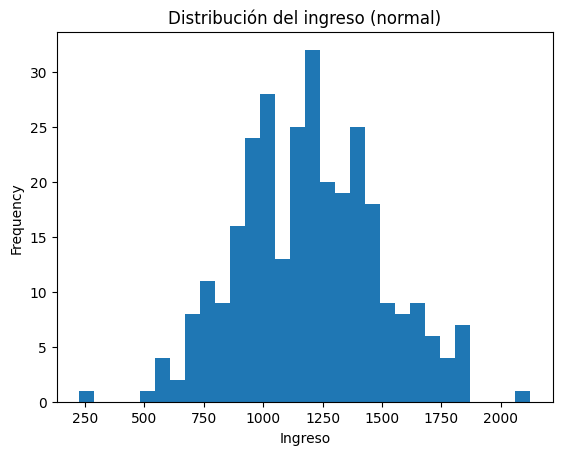

In [6]:

df["ingreso"].plot(kind="hist", bins=30)
plt.title("Distribución del ingreso (normal)")
plt.xlabel("Ingreso")
plt.savefig(r"C:\Users\marco\Downloads\Distribución_del_ingreso_normal.png")
plt.show()




## 9. Actividad 2: interpretación social de los parámetros



### Discusión guiada

* Aumentar `loc` → crecimiento económico
* Aumentar `scale` → mayor desigualdad
* Misma media ≠ misma estructura social

* Aquí se conecta **estadística + sociología**.




## 10. Actividad 3: ingreso condicionado al estrato (estratificación)


In [7]:


medias = {
    1: 800,
    2: 1000,
    3: 1300,
    4: 1700,
    5: 2200,
    6: 3000
}

df["ingreso"] = df["estrato"].apply(
    lambda e: np.random.normal(
        loc=medias[e],
        scale=0.2 * medias[e]
    )
)




## 11. Lectura estructural del resultado


In [8]:
df.groupby("estrato")["ingreso"].mean()



estrato
1     808.593669
2    1016.776256
3    1309.099214
4    1627.525508
5    2134.378808
6    2512.152140
Name: ingreso, dtype: float64

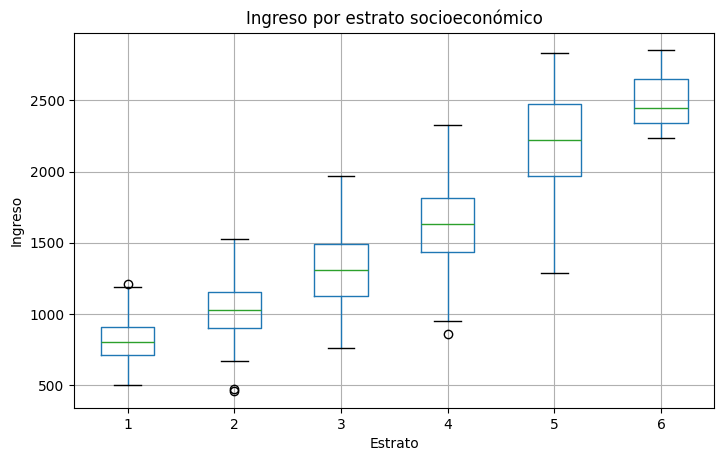

In [9]:

df.boxplot(column="ingreso", by="estrato", figsize=(8,5))
plt.title("Ingreso por estrato socioeconómico")
plt.suptitle("")
plt.xlabel("Estrato")
plt.ylabel("Ingreso")
plt.savefig(r"C:\Users\marco\Downloads\Ingreso_por_estrato_socioeconómico.png")
plt.show()




# Interpretación social

* El ingreso **no es aleatorio puro**
* Está **estructurado por estrato**
* Se visualiza la desigualdad

---



## 12. Actividad 4: comparación con `np.random.choice()`

| Función              | Tipo de variable |
| -------------------- | ---------------- |
| `np.random.choice()` | Categórica       |
| `np.random.normal()` | Continua         |

> Ambas son necesarias para construir datasets sociales realistas.

---



# 13. Errores conceptuales comunes

* Pensar que el ingreso real siempre es normal
* Ignorar valores negativos
* Usar la misma media para todos los estratos
* Confundir dispersión con error

* Discusión crítica:

> *¿Qué tan realista es la normalidad del ingreso?*




## 14. Actividad de cierre (preparación para OLS)

### Preguntas reflexivas

1. ¿Qué variables podrían explicar el ingreso?
2. ¿Qué pasa si ignoro el estrato?
3. ¿Por qué este diseño prepara el camino para OLS?

---



# 15. Proyección en el curso

Esta actividad prepara directamente para:

* regresión OLS (`smf.ols`)
* interpretación de coeficientes
* análisis de brechas sociales
* lectura crítica de p-valores




## 16. Cierre pedagógico

> **`np.random.normal()` permite pasar de categorías sociales
> a magnitudes cuantitativas con estructura social.**

Conecta:

$$
\text{Probabilidad} \rightarrow \text{Desigualdad} \rightarrow \text{Modelo}
$$

---



# en el siguiente paso puedo:

* Integraremos esta actividad con **OLS y p-valores**
* Comparar normal vs log-normal (muy realista para ingresos)
* Traducir el ejercicio a **STATA (`rnormal`)**
* Diseñar una **rúbrica de evaluación**

Este diseño encaja perfectamente con tu enfoque crítico, experimental y formativo.
